In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
q=0.1
fname = "DATA/dataRBM_q" + str(q) + ".csv"
v = np.loadtxt(fname, delimiter=",", dtype = int)
N = len(v)
L = len(v[0])
print(f"each of N={N} data samples has L={L} digits")
for n in range(10):
    print(v[n])
print("...")

SPINS = True
if SPINS:
    vmin = -1
    GAP = 2
    v = 2*v - 1
else:
    vmin = 0
    GAP = 1
    
#store initial values
v0 = v

for n in range(10):
    print(v[n])
print("...")

each of N=10000 data samples has L=8 digits
[0 1 0 0 1 0 1 1]
[1 1 0 1 1 0 0 1]
[0 1 1 1 0 0 1 1]
[0 0 1 1 1 1 0 0]
[0 0 1 1 0 0 1 0]
[1 1 0 0 1 0 0 0]
[0 1 1 0 1 1 0 0]
[1 1 0 0 0 0 1 1]
[1 0 0 1 1 1 0 1]
[1 0 0 0 0 0 1 0]
...
[-1  1 -1 -1  1 -1  1  1]
[ 1  1 -1  1  1 -1 -1  1]
[-1  1  1  1 -1 -1  1  1]
[-1 -1  1  1  1  1 -1 -1]
[-1 -1  1  1 -1 -1  1 -1]
[ 1  1 -1 -1  1 -1 -1 -1]
[-1  1  1 -1  1  1 -1 -1]
[ 1  1 -1 -1 -1 -1  1  1]
[ 1 -1 -1  1  1  1 -1  1]
[ 1 -1 -1 -1 -1 -1  1 -1]
...


In [6]:
#number of hidden unit
M = 3
sigma = np.sqrt(4./float(L+M))
np.random.seed(12345)
w = sigma * (2*np.random.rand(L,M) - 1)
a = sigma * (2*np.random.rand(L) - 1)
b = np.zeros(M)
print("w =\n", w)
print("\na =\n", a)
print("\nb =\n", b)
w0, a0, b0 = w, a, b

w =
 [[ 0.5181365  -0.22145941 -0.38120826]
 [-0.35631371  0.08167946  0.11523125]
 [ 0.56022559  0.18473853  0.3001927 ]
 [ 0.18521223  0.2987553   0.55635686]
 [-0.59290602 -0.47464594 -0.24277246]
 [ 0.18863898  0.373648    0.44886104]
 [ 0.56038609  0.26977468  0.17183171]
 [ 0.26225893 -0.03907707 -0.21035279]]

a =
 [-0.07279134  0.27701546  0.59580401  0.21331772  0.35074515 -0.39689234
 -0.57064124  0.36226014]

b =
 [0. 0. 0.]


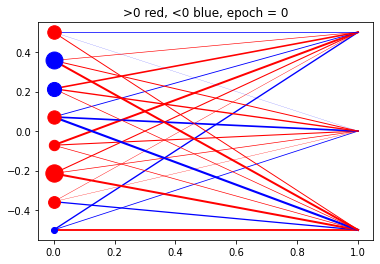

In [7]:
def create_coord(np, x0):
    x = [x0] * np
    y = list(range(np))
    for i in range(np):
        y[i] = y[i]/(np-1.) - 0.5
    return (x, y)

(x1, y1) = create_coord(L, 0)
(x2, y2) = create_coord(M, 1)

def mycolor(val):
    if val > 0:
        return 'red'
    elif val < 0:
        return 'blue'
    return 'black'

def plotgraph(epoch=0):
    A = 2./w.max()
    for i in range(L):
        for j in range(M):
            ex, ey, col = (x1[i], x2[j]), (y1[i], y2[j]), mycolor(w[i][j])
            plt.plot(ex, ey, col, zorder = 1, lw=A*np.abs(w[i][j]))
    A = 300./(a.max() + b.max())
    for i in range(L):
        plt.scatter(x1[i], y1[i], s = A*np.abs(a[i]), zorder = 2, c = mycolor(a[i]))
    for j in range(M):
        plt.scatter(x2[j], y2[j], s = A*np.abs(b[j]), zorder = 2, c = mycolor(b[j]))
    plt.title(f">0 red, <0 blue, epoch = {epoch}")
    plt.show()

plotgraph()

In [8]:
def activate(v_in, wei, bias, DE, info = False):
    act = np.dot(v_in, wei) + bias
    prob = 1./(1.+np.exp(-DE*act))
    n = len(act)
    v_out = np.full(n, vmin)
    v_out[np.random.random_sample(n) < prob] = 1
    if info:
        print("input =\n", v_in)
        print("act =\n", act)
        print("prob = \n", prob)
        print("out = \n", v_out)
    return v_out

activate(v[0], w, b, GAP, info = True)

input =
 [-1  1 -1 -1  1 -1  1  1]
act =
 [-1.57878802 -0.79795129 -1.09026463]
prob = 
 [0.0407938  0.16855507 0.10151264]
out = 
 [-1  1 -1]


array([-1,  1, -1])

---- epoch = 1  n= 499  m= 500
dw= [[-0.328 -0.264 -0.364]
 [ 0.104 -0.264 -0.492]
 [-0.184  0.048  0.236]
 [-0.068  0.092  0.096]
 [-0.04   0.336  0.436]
 [-0.68  -0.512 -0.196]
 [-0.044 -0.1   -0.312]
 [ 0.36   0.208  0.044]]
da= [ 0.072 -0.344 -0.304 -0.22  -0.208  0.24   0.38  -0.272]
db= [-0.008  0.112  0.044]
---- epoch = 2  n= 499  m= 500
dw= [[-0.03428571 -0.03809524 -0.02666667]
 [-0.02285714  0.01904762 -0.06095238]
 [ 0.05333333 -0.01904762 -0.03809524]
 [ 0.04190476 -0.02285714  0.01904762]
 [ 0.03047619  0.03428571  0.00761905]
 [ 0.00761905  0.01142857  0.        ]
 [ 0.02666667  0.09142857  0.11047619]
 [-0.04952381  0.0152381   0.05714286]]
da= [ 0.         -0.0952381  -0.0952381   0.02285714  0.00380952  0.04952381
 -0.03047619  0.00761905]
db= [-0.00380952  0.02285714 -0.02666667]


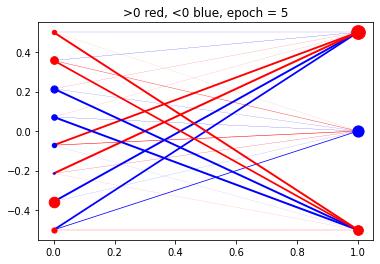

l_rate =  0.7999999999999998


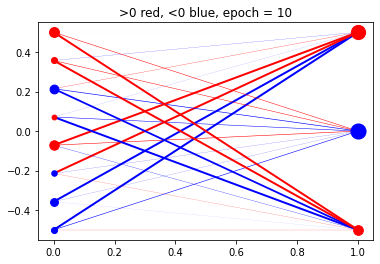

l_rate =  0.6666666666666663


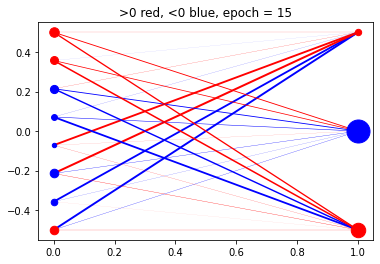

l_rate =  0.5714285714285713


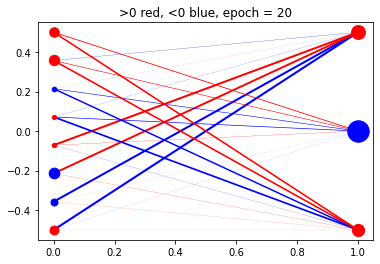

l_rate =  0.5


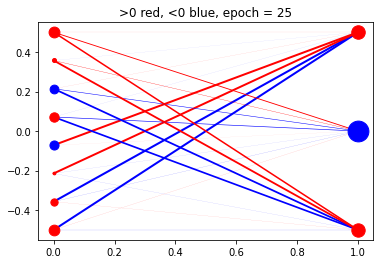

l_rate =  0.4444444444444445


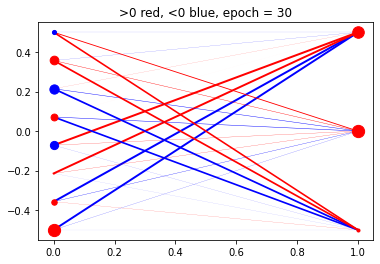

l_rate =  0.4000000000000001


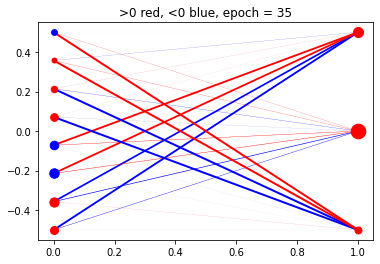

l_rate =  0.3636363636363637


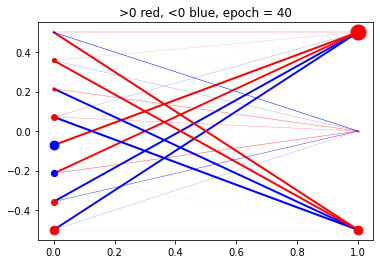

l_rate =  0.3333333333333335


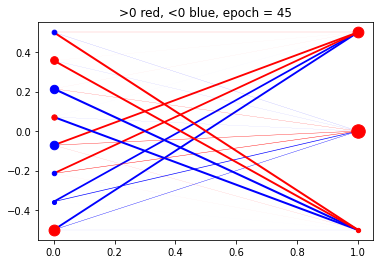

l_rate =  0.3076923076923079


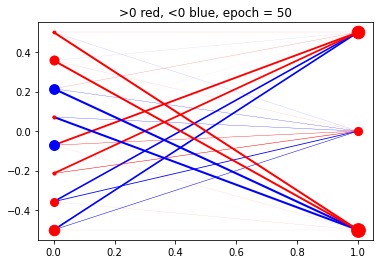

l_rate =  0.28571428571428586


In [9]:
np.random.seed(12345)

l_rate = 1.0
#minibatches
mini, m = 500, 0
#epochs 
nepoch = 50

for epoch in range(1, 1+nepoch):
    for n in range(N):
        if m==0:
            #initialize
            v_data, v_model = np.zeros(L), np.zeros(L)
            h_data, h_model = np.zeros(M), np.zeros(M)
            vh_data, vh_model = np.zeros((L,M)), np.zeros((L, M))
        
        #positive CD phase
        h = activate(v[n], w, b, GAP)
        #negative CD phase
        vf = activate(h, w.T, a, GAP)
        # positive CD pahse nr 2
        hf = activate(vf, w, b, GAP)
        
        v_data += v[n]
        v_model += vf
        h_data += h
        h_model += hf
        vh_data += np.outer(v[n].T, h)
        vh_model += np.outer(vf.T, hf)
        
        m+=1
        
        if m == mini:
            C = l_rate/mini
            dw = C*(vh_data-vh_model)
            da = C*(v_data-v_model)
            db = C*(h_data-h_model)
            if epoch<=2 and n<=mini:
                print("---- epoch =", epoch, " n=", n, " m=", m)
                print("dw=", dw)
                print("da=", da)
                print("db=", db)
            w += dw
            a += da
            b += db
            m = 0
    #randomize order
    np.random.shuffle(v)
    l_rate = l_rate/(0.05*l_rate + 1)
    if epoch%5 == 0:
        plotgraph(epoch)
        print("l_rate = ", l_rate)

In [10]:
print("w0 =\n", w0)
print("w = \n", w)
print("a0 =\n", a0)
print("a = \n", a)
print("b0 =\n", b0)
print("b = \n", b)

w0 =
 [[ 0.02171124 -0.26873938 -0.92119004]
 [ 0.03230623 -0.44587721 -0.87792225]
 [ 0.0027983   0.26855059  0.97143181]
 [ 0.0325563   0.18968199  1.01772041]
 [-1.10525062 -0.13919547  0.01304859]
 [-1.13931532 -0.12245187  0.07893525]
 [ 1.08211543  0.03745091 -0.02486905]
 [ 1.08837571 -0.04699076  0.05227338]]
w = 
 [[ 0.02171124 -0.26873938 -0.92119004]
 [ 0.03230623 -0.44587721 -0.87792225]
 [ 0.0027983   0.26855059  0.97143181]
 [ 0.0325563   0.18968199  1.01772041]
 [-1.10525062 -0.13919547  0.01304859]
 [-1.13931532 -0.12245187  0.07893525]
 [ 1.08211543  0.03745091 -0.02486905]
 [ 1.08837571 -0.04699076  0.05227338]]
a0 =
 [ 0.03421614  0.01947759  0.00309382 -0.03005935  0.00292162 -0.02941458
  0.02498672  0.00249661]
a = 
 [ 0.03421614  0.01947759  0.00309382 -0.03005935  0.00292162 -0.02941458
  0.02498672  0.00249661]
b0 =
 [0.05781366 0.02041855 0.04868252]
b = 
 [0.05781366 0.02041855 0.04868252]


In [11]:
v1 = np.full((N, L), vmin)
for n in range(N):
    h = activate(v0[n], w, b, GAP)
    v1[n] = activate(h, w.T, a, GAP)

for n in range(10):
    print((v0[n]).astype(int), (v1[n]).astype(int))

[-1 -1  1  1  1  1 -1 -1] [-1  1  1  1  1  1  1 -1]
[ 1  1 -1 -1 -1 -1  1 -1] [ 1  1 -1 -1 -1 -1  1  1]
[ 1  1 -1 -1  1  1 -1 -1] [ 1  1 -1 -1  1  1 -1 -1]
[-1 -1 -1  1  1  1 -1  1] [-1 -1  1  1  1  1 -1 -1]
[ 1  1 -1 -1 -1 -1  1 -1] [ 1 -1  1 -1 -1 -1  1  1]
[ 1 -1 -1 -1  1  1 -1  1] [-1  1 -1 -1  1 -1  1 -1]
[-1 -1  1  1 -1 -1  1  1] [ 1 -1 -1  1 -1 -1  1  1]
[-1  1 -1 -1  1  1 -1 -1] [ 1  1 -1 -1  1  1 -1 -1]
[ 1 -1 -1 -1 -1 -1  1  1] [ 1 -1 -1 -1 -1 -1  1  1]
[-1 -1  1  1 -1 -1  1  1] [-1 -1  1  1 -1 -1  1  1]
